# Third Assignment - FINTECH 540 - Machine Learning for FinTech - Volatility Forecasting with Neural Networks

In this assignment, you will implement a neural network architecture for volatility forecasting. The primary objective of this regression task is to achieve a satisfactory performance on the test set (out-of-sample).

## Some context about volatility
In finance, volatility is one of the most important factors to consider to make appropriate decisions. Volatility is a measure of the variation of prices for a given stock or a market index over some time. Low volatility indicates relatively stable stock prices, while high volatility is associated with wild price fluctuations associated with a risky market. Volatility is particularly significant in several financial activities, such as risk and portfolio management or derivative pricing.

Volatility refers to the degree of fluctuation of the price of an asset. It is not directly observable, and different definitions in the financial domain are used to measure it.

We can distinguish between the following types of volatility:

- Historical volatility
- Implied volatility
- Volatility index
- Intraday volatility
- Realized volatility

**Historical Volatility**

Historical volatility measures the past price changes of an underlying financial instrument over a given period. It is usually defined as the standard deviation of returns, which is obtained by calculating the variance as follows:

$$\sigma^2=\left(E\left[|r-\mu|^2\right]\right)^{1 / 2}$$


Here,  $\mu$ stands for the expected value, $r$ represents the returns over a given period, and  $\bar{x}$ is the mean price in the same period. Historical volatility may be used to predict future price movements based on previous behavior, but it does not provide insights regarding the future trend or direction of prices.

**Implied Volatility**

Implied volatility isn't calculated from the historical prices of the stock but instead estimates the future volatility by looking at the market price of the options. Whereas historical volatility is static for a fixed given period, implied volatility varies for a stock based on different options strike prices.

Implied volatility is calculated by applying the Black-Scholes option pricing model. This partial differential equation describes the price of an option over time and solving it for the value of volatility. There are several approaches to calculating the implied volatility, with the iterative search being the most straightforward method.

Implied volatility is a critical parameter in option pricing since it provides a forward-looking estimation of possible future price fluctuations.

**Volatility Index**

The volatility index is a measure of volatility applied to a market index or its exchange-traded fund equivalent. There are several volatility indexes quoted in financial markets, with the Chicago Board Options Exchange (CBOE) Volatility Index (VIX) being the most popular one.

The volatility index can be calculated as the weighted average of the implied volatilities for several options related to a specific index. Traders use this index as an indicator of investor sentiment to identify if there is too much optimism or fear in the market and, hence, possible reversals.

**Intraday Volatility**

Intraday volatility uses high-frequency asset prices, representing the market fluctuations during a trading day. Intraday volatility provides much more accurate variance estimations since it uses more observations.


**Realized Volatility**

Realized volatility also uses intraday information. It's based on the realized variance introduced by Barndorff-Nielsen and Shephard (2001). Over an interval of time of a length of $T$, the realized variance can be defined as the sum of squared intraday changes over a day:


$$
\{y\}_n=\sum_{j=1}^M\left\{y^*\left((n-1) \Delta+\frac{\Delta j}{M}\right)-y^*\left((n-1) \Delta+\frac{\Delta(j-1)}{M}\right)\right\}^2, \quad n=1,2, \ldots
$$

Here, $P$ represents the stock log prices, and $N$ is the number of intraday observations during a day.


The realized volatility is the square root of the realized variance. It provides an efficient measure of volatility since it considers all transactions in a given day.

## Dataset Overview

The realized measure of volatility in the dataset is given by a realized kernel introduced by Barndorff-Nielsen et al. (2008). The realized kernel yields a more robust volatility estimation, even in noise. 

- **Assets**: 28 stocks + 1 ETF (SPY).
- **Features**: Daily returns (close-to-close) and realized volatility estimates. Each feature follow the name convention: "SYMBOL_ret" for return and "SYMBOL_vol" for the volatility.
- **Format**: Divided into train and test sets (2 files are provided).


## Task and General Hints

In this assignment, you are tasked with building a predictive regression model on equity data. Your primary goal is to ensure accurate out-of-sample predictions and evaluate them with the below-mentioned metric.

**THE TARGET VARIABLE YOU HAVE TO PREDICT**

This is a univariate prediction task. The target variable is already provided in both the train and the test file. The name of the target variable is **SPY_vol_t+1**. You are indeed trying to predict the volatility of the SPY ETF of the next day based on the amount of information that you have. Based on this information you can assume that all the other features in the dataset are at time $t$. Only the target is at time $t+1$ since you have to solve a forecasting problem. Do not create another target variable. 

To guide you through this process, consider breaking down your tasks into the following three phases:

**Preprocessing**
The dataset is already free of inconsistencies, missing values, or outliers. 
- **Feature Engineering**: You might want to create additional variables (lags, etc..) or perform transformations. Ensure that all the variables you want to use for modeling are correctly preprocessed. You don't need to use all the variables necessarily. You will eventually refine your choices while modeling.
- **Data Splitting**: The dataset is partitioned, and two files are provided to you.

**Model Selection**
- This notebook focuses on using neural networks for regression. You can experiment with the different neural network architectures we have seen in class. Feel free to compare the performance against a linear regression model. 

**Model Tuning and Evaluation**
- Once you've selected a model, you'll want to fine-tune its parameters to achieve the best out-of-sample performance.
- You may adjust parameters manually, or you can construct a routine to fit several models with different hyperparameters. 
- Evaluate your final model using the Root Mean Squared Error (RMSE) metrics. The last cell of this notebook will also take care of it, so follow the naming convention stated at the bottom of the notebook.

**Note**: Parameter choices and tuning should be made thoughtfully while it is up to you. Carefully study the documentation of the neural network models and refer to the Jupyer Notebooks we used in class to see the possible parameters you can fine-tune.

**IMPORTANT REMARK**: 
You must use the test set solely as data the model has never seen before. The results on that part of the dataset are those that are going to provide your grade.

Remember to set the seed when training and instantiating your model. You can use either Keras (Tensorflow) or Pytorch for this task, and you must make your results fully reproducible for grading. Double-check that you have correctly set the seed before diving into the coding part.

- [Setting the seed in Keras](https://www.tensorflow.org/api_docs/python/tf/keras/utils/set_random_seed)
- [Setting the seed in Pytorch](https://pytorch.org/docs/stable/notes/randomness.html)

## Grading Rubric

Your grade will be determined by the **normalized Root Mean Squared Error (RMSE)** your model achieves on the test set. Specifically, your grade will be calculated as:

$$ \text{Grade} = \text{Normalized RMSE} \times 100 $$

which will be a number between 0 and 100. Grades may be curved before being released.

The normalization for RMSE is defined as:

$$ \text{Normalized RMSE} = 1 - \left( \frac{\text{RMSE}}{\text{MAX_POSSIBLE_RMSE}} \right) $$

Where `MAX_POSSIBLE_RMSE` represents a domain-specific value that signifies the worst possible RMSE for your dataset, which could be set as the standard deviation of the target variable. This normalization ensures that the RMSE value is scaled between 0 (worst) and 1 (best).

The prediction quality assessed by those metrics will result from all the choices you made when it comes to preprocessing features, including them into a model, selecting and evaluating a proper regression model, and eventually doing hyperparameter optimization. 

In [1]:
# Standard Library Imports
import os
import sys
import math
import time
import random
import pdb
from collections import OrderedDict

# Third-Party Scientific Computing Libraries
import numpy as np
import pandas as pd
from scipy.ndimage import shift

# Machine Learning Libraries
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Deep Learning Libraries - PyTorch
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader, Subset

# Deep Learning Libraries - TensorFlow and Keras
import tensorflow as tf
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization

# Data Acquisition and Visualization Libraries
import yfinance as yf
import matplotlib.pyplot as plt
from IPython.display import Image

# Setting the Device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define the NN
# neural network 
BATCH_SIZE = 64
N_EPOCHS = 300


In [2]:
df_train = pd.read_csv('train_retvol_dataset.csv')
df_test = pd.read_csv('test_retvol_dataset.csv')
# remove the date column
df_train.drop(df_train.columns[0], axis=1, inplace=True)
df_test.drop(df_test.columns[0], axis=1, inplace=True)


# Select TOP most important features

In [3]:
rf_X = df_train.iloc[:, :-1]
rf_y = df_train.iloc[:, -1]

# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=300, random_state=42)  # or RandomForestClassifier
rf.fit(rf_X, rf_y)

# Get feature importances
importances = rf.feature_importances_

# Put the importances into a DataFrame for easier viewing
feature_importance_df = pd.DataFrame({'Feature': rf_X.columns, 'Importance': importances})

In [4]:
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

In [5]:
# Sort the DataFrame to see the most important features at the top
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
features_selected = pd.concat([feature_importance_df.head(4)['Feature'], pd.Series(['SPY_vol_t+1'])])

In [6]:
df_train = df_train[features_selected]
df_test = df_test[features_selected]

# Scaling

In [7]:
"""
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df_train)

scaled_train = scaler.transform(df_train)
scaled_test = scaler.transform(df_test)
scaled_inputs = np.concatenate((scaled_train,
                                scaled_test))
"""

'\nscaler = MinMaxScaler(feature_range=(0, 1))\nscaler.fit(df_train)\n\nscaled_train = scaler.transform(df_train)\nscaled_test = scaler.transform(df_test)\nscaled_inputs = np.concatenate((scaled_train,\n                                scaled_test))\n'

In [8]:
import numpy as np

# Offset to handle negative values and zeros
offset = 1 - df_train.min()  # Assuming df_train.min() gives the minimum value for each column

# Apply log transformation
log_scaled_train = np.log(df_train + offset)
log_scaled_test = np.log(df_test + offset)
scaled_inputs = np.concatenate((log_scaled_train,
                                log_scaled_test))

In [9]:
"""
view_train = pd.DataFrame(scaler.transform(df_train))
view_train.columns = df_train.columns
"""

'\nview_train = pd.DataFrame(scaler.transform(df_train))\nview_train.columns = df_train.columns\n'

In [10]:
"""view_train"""

'view_train'

In [11]:
"""view_test = pd.DataFrame(scaler.transform(df_test))
view_test.columns = df_test.columns
view_test"""

'view_test = pd.DataFrame(scaler.transform(df_test))\nview_test.columns = df_test.columns\nview_test'

# Lag

In [12]:
TIME_PERIOD = 1 #1 indicate no lagging, I know it's kind of weird, but that what it is... I'm tired of modifying this function. A minor issue.
def create_input_data(series, n_lags=1, n_leads=0):
    '''
    Function for transforming time series into input acceptable by a multilayer perceptron.
    
    Parameters
    ----------
    series : np.array
        The time series to be transformed
    n_lags : int
        The number of lagged observations to consider as features, 1 indicate
    n_leads : int
        The number of future periods we want to forecast for
        
    Returns
    -------
    X : np.array
        Array of features
    y : np.array
        Array of target
    '''
    X = []
    y = []
    for step in range(len(series) - n_lags - n_leads+1):
        end_step = step + n_lags
        forward_end = end_step + n_leads
        X.append(series[step:end_step,:-1])# The last feature is the target, so it should not be inlcuded in X
        # HERE THE CODE IS SELECTING JUST THE FIRST COLUMN AS TARGET. ONE NEEDS TO MODIFY THE SECOND INDEXING TO INCLUDE MORE THAN ONE OUTPUT AS TARGET VARIABLES
        # FOR INSTANCE YOU MAY WANT TO WRITE y.append(series[end_step:forward_end][0]) TO TAKE ALL THE INCLUDED FEATURES AS TARGET VARIABLES (RET AND VOLUME...)
        # y.append(series[end_step:forward_end][0][:]) THIS IS AN ALTERNATIVE WAY TO INCLUDE EVERY FEATURES AS TARGET
        y.append(series[end_step-1:forward_end][0][-1]) #THIS WILL INCLUDE JUST THE LAST FEATURE (THE T+1 VOL IN THIS CASE) 
    return np.array(X), np.array(y)

In [13]:
scaled_X,scaled_y = create_input_data(scaled_inputs,TIME_PERIOD)


# Train Test Split

In [14]:
split_idx = len(scaled_X)-df_test.shape[0]

In [15]:
X = scaled_X[:split_idx][:][:]
X_test = scaled_X[split_idx:][:][:]
y = scaled_y[:split_idx][:][:]
y_test = scaled_y[split_idx:][:][:]

In [16]:
X.shape

(1312, 1, 4)

In [17]:
X_test.shape

(327, 1, 4)

In [18]:
scaled_inputs

array([[0.66605772, 1.24062915, 1.3057641 , 1.258461  , 0.38957698],
       [0.38957698, 1.06087884, 0.80182953, 0.9439059 , 0.55384304],
       [0.55384304, 1.6147888 , 0.79025796, 1.03318448, 0.41828707],
       ...,
       [0.70998192, 2.88065368, 0.46462902, 1.38629438, 0.52079567],
       [0.52079567, 2.91152215, 0.33214505, 1.23837426, 0.51805914],
       [0.51805914, 3.13264962, 0.40181179, 1.30833285, 0.74283533]])

# Data Loader

In [19]:
#Transform the data into the form that will accepted by RNN
#seed
# custom function for reproducibility
def custom_set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

custom_set_seed(42)
#dataset loader
X_tensor = torch.from_numpy(X).float().reshape(X.shape[0],X.shape[1],X.shape[2])
y_tensor = torch.from_numpy(y).float().reshape(X.shape[0], 1)
X_test_tensor = torch.from_numpy(X_test).float().reshape(X_test.shape[0],X_test.shape[1],X.shape[2])
y_test_tensor = torch.from_numpy(y_test).float().reshape(X_test.shape[0], 1)


train_dataset = TensorDataset(X_tensor, y_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE,
                         shuffle = True)
test_loader = DataLoader(dataset=test_dataset, 
                          batch_size=BATCH_SIZE)

print(f'Size of datasets - training: {len(train_loader.dataset)} | Test: {len(test_loader.dataset)}')

Size of datasets - training: 1312 | Test: 327


# Build Model

In [20]:
#define the model

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, n_layers, output_size):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, 
                          n_layers, batch_first=True,
                          nonlinearity='relu')
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        output, _ = self.rnn(x)
        output = self.fc(output[:,-1,:]) 
        return output
# instantiate the model, the loss function and the omptimizer

model = RNN(input_size=X.shape[2], hidden_size=128,
            n_layers=2, output_size=1).to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [21]:
model

RNN(
  (rnn): RNN(4, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)

In [22]:
PRINT_EVERY = 10
train_losses, test_losses = [], []

for epoch in range(N_EPOCHS):
    running_loss_train = 0
    running_loss_test = 0

    model.train()
    
    for x_batch, y_batch in train_loader:
        
        optimizer.zero_grad()
        
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        y_hat = model(x_batch)
        loss = torch.sqrt(loss_fn(y_batch, y_hat))
        loss.backward()
        optimizer.step()
        running_loss_train += loss.item() * x_batch.size(0)
        
    epoch_loss_train = running_loss_train / len(train_loader.dataset)
    train_losses.append(epoch_loss_train)

    with torch.no_grad():
        model.eval()
        for x_val, y_val in test_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            y_hat = model(x_val)
            loss = torch.sqrt(loss_fn(y_val, y_hat))
            running_loss_test += loss.item() * x_val.size(0)
            
        epoch_loss_test = running_loss_test / len(test_loader.dataset)
            
        if epoch > 0 and epoch_loss_test < min(test_losses):
            best_epoch = epoch
            torch.save(model.state_dict(), 'models/rnn_checkpoint.pth')
            
        test_losses.append(epoch_loss_test)

    if epoch % PRINT_EVERY == 0:
        print(f"<{epoch}> - Train. loss: {epoch_loss_train:.10f} \t Test. loss: {epoch_loss_test:.10f}")
        
print(f'Lowest loss recorded in epoch: {best_epoch}')

<0> - Train. loss: 0.6201328228 	 Test. loss: 0.6931184264
<10> - Train. loss: 0.1725585788 	 Test. loss: 0.2213044530
<20> - Train. loss: 0.1447456962 	 Test. loss: 0.2174695736
<30> - Train. loss: 0.1425367023 	 Test. loss: 0.2155260703
<40> - Train. loss: 0.1411633052 	 Test. loss: 0.2174527985
<50> - Train. loss: 0.1410136219 	 Test. loss: 0.2151729290
<60> - Train. loss: 0.1402756597 	 Test. loss: 0.2148034244
<70> - Train. loss: 0.1385148157 	 Test. loss: 0.2160712519
<80> - Train. loss: 0.1388711973 	 Test. loss: 0.2165629570
<90> - Train. loss: 0.1366228485 	 Test. loss: 0.2174094846
<100> - Train. loss: 0.1381596185 	 Test. loss: 0.2185958199
<110> - Train. loss: 0.1369066413 	 Test. loss: 0.2196608943
<120> - Train. loss: 0.1368743210 	 Test. loss: 0.2212145884
<130> - Train. loss: 0.1360360070 	 Test. loss: 0.2221854041
<140> - Train. loss: 0.1359082322 	 Test. loss: 0.2233889122
<150> - Train. loss: 0.1353780206 	 Test. loss: 0.2240038986
<160> - Train. loss: 0.1357220673 	

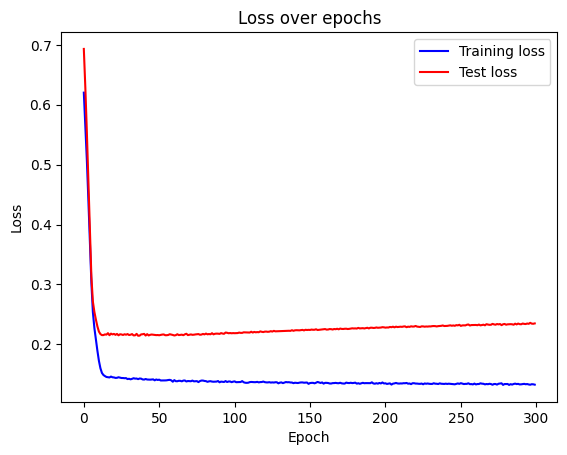

In [23]:
train_losses = np.array(train_losses)
test_losses = np.array(test_losses)

fig, ax = plt.subplots()

ax.plot(train_losses, color='blue', label='Training loss')
ax.plot(test_losses, color='red', label='Test loss')

ax.set(title="Loss over epochs", 
       xlabel='Epoch', 
       ylabel='Loss')
ax.legend()

In [24]:
state_dict = torch.load('models/rnn_checkpoint.pth')
model.load_state_dict(state_dict)

<All keys matched successfully>

In [25]:
y_test_pred = []

with torch.no_grad():
    model.eval()
    for x_val, y_val in test_loader:
        x_val = x_val.to(device)
        y_hat = model(x_val)
        y_test_pred.append(y_hat)

y_test_pred = torch.cat(y_test_pred).cpu().numpy().flatten()

In [26]:
# Convert from log form back into original form
y_test_pred = np.exp(y_test_pred) - offset[-1]
y_test = np.exp(y_test) - offset[-1]

RNN's forecast - MSE: 0.3956574769, RMSE: 0.6290130976


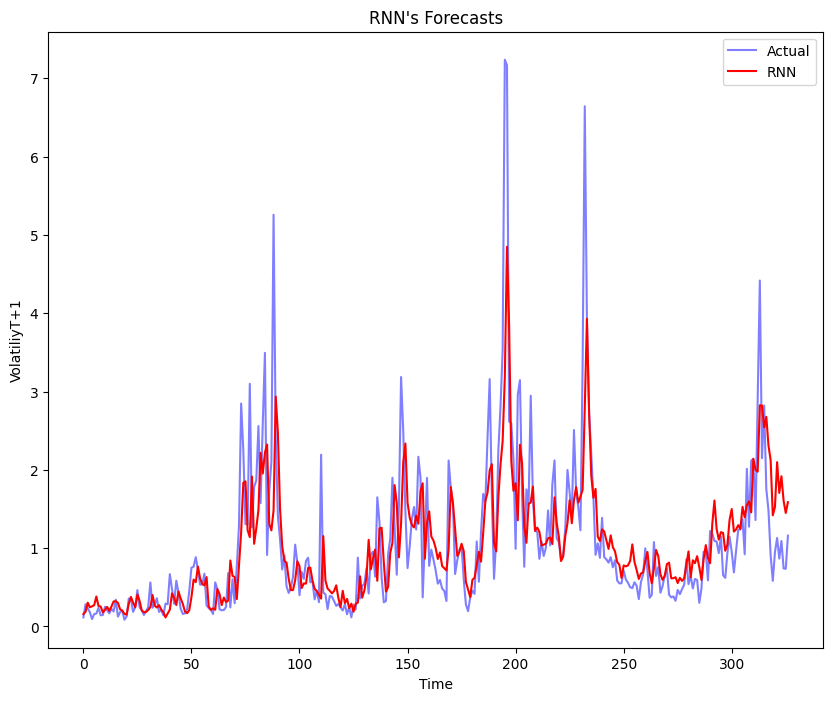

In [27]:
rnn_mse = mean_squared_error(y_test, y_test_pred)
rnn_rmse = np.sqrt(rnn_mse)
print(f"RNN's forecast - MSE: {rnn_mse:.10f}, RMSE: {rnn_rmse:.10f}")

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(y_test, color='blue', label='Actual', alpha=0.5)
ax.plot(y_test_pred, color='red', label='RNN')
#ax.plot(naive_pred, color='green', label='Naïve',alpha=0.5)

ax.set(title="RNN's Forecasts", 
       xlabel='Time', 
       ylabel='VolatiliyT+1')
ax.legend()


**Instructions to let the next code cell run:**

Before running the cell below, ensure the following:
1. The target variable of your problem has to be named exactly `y_test`, while the out-of-sample prediction variable has to be named `y_test_pred`. Also the calculation of `MAX_POSSIBLE_RMSE` relies on this naming convention to determine the standard deviation of the test target values. 

By adhering to these naming conventions, the grading cell can compute the final score without any issues.

In [28]:
import math
import numpy as np

def evaluate(y_test, y_test_pred):
    """
    Function to calculate RMSE for one-dimensional arrays
    """
    mse = np.mean((y_test - y_test_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

rmse = evaluate(y_test, y_test_pred)

MAX_POSSIBLE_RMSE = y_test.std()
normalized_rmse = (1 - rmse / MAX_POSSIBLE_RMSE)

Grade = normalized_rmse
print('The grade for this assignment is ', math.ceil(Grade * 100))

The grade for this assignment is  37
